In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from keras.src.callbacks import EarlyStopping
import pickle

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Scaling the data to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Adding color channel and resizing
x_train_vgg = np.stack([x_train] * 3, axis=-1)
x_test_vgg = np.stack([x_test] * 3, axis=-1)

# Resizing images to 32x32
x_train = tf.image.resize(x_train_vgg, [48, 48]).numpy()
x_test = tf.image.resize(x_test_vgg, [48, 48]).numpy()

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator()

# Create generators
train_generator = train_datagen.flow(x_train, y_train, batch_size=48)
validation_generator = test_datagen.flow(x_test, y_test, batch_size=48)

# Check if generators are working properly
x_batch, y_batch = next(train_generator)
print(f'x_batch shape: {x_batch.shape}, y_batch shape: {y_batch.shape}')

# Checking the actual number of batches that the generators can create
train_batches = len(train_generator)
validation_batches = len(validation_generator)

# print(f'Number of training batches: {train_batches}')
# print(f'Number of validation batches: {validation_batches}')

In [ ]:
# Load the VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Build the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Freeze the layers of VGG16
base_model.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(train_generator, epochs=30, validation_data=validation_generator, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy of CNN: {test_acc}')
print(f'Test loss of CNN: {test_loss}')

# Unfreeze the top layers of VGG16 and retrain
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Compile the model with a lower learning rate
model.compile(optimizer=RMSprop(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with unfrozen layers
history_fine = model.fit(train_generator, epochs=20, validation_data=validation_generator, callbacks=[early_stopping])

# Evaluate the model again
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy of fine-tuned CNN: {test_acc}')
print(f'Test loss of fine-tuned CNN: {test_loss}')

In [ ]:
# Assuming 'history' is the history object returned by model.fit()
with open('history_vgg16.pkl', 'wb') as f:
    pickle.dump(history.history, f)

In [ ]:
# Save the model using the native Keras format
# model.save('model_vgg16.h5')
model.save('model_vgg16.keras')  # for the convolutional neural network

In [ ]:
# Load the VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Build the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Freeze the layers of VGG16
base_model.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=20, validation_data=validation_generator)

# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy of CNN: {test_acc}')
print(f'Test loss of CNN: {test_loss}')

In [16]:
# Unfreeze the top layers of VGG16 and retrain
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Compile the model with a lower learning rate
model.compile(optimizer=RMSprop(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with unfrozen layers
history_fine = model.fit(train_generator, epochs=20, validation_data=validation_generator)

# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy of CNN: {test_acc}')
print(f'Test loss of CNN: {test_loss}')

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 171s 136ms/step - accuracy: 0.8416 - loss: 0.4372 - val_accuracy: 0.8679 - val_loss: 0.3790
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 169s 135ms/step - accuracy: 0.8613 - loss: 0.3893 - val_accuracy: 0.8764 - val_loss: 0.3455
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 169s 135ms/step - accuracy: 0.8653 - loss: 0.3696 - val_accuracy: 0.8822 - val_loss: 0.3359
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 169s 135ms/step - accuracy: 0.8755 - loss: 0.3497 - val_accuracy: 0.8797 - val_loss: 0.3437
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 169s 135ms/step - accuracy: 0.8749 - loss: 0.3470 - val_accuracy: 0.8833 - val_loss: 0.3393
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 169s 135ms/step - accuracy: 0.8775 - loss: 0.3398 - val_accuracy: 0.8903 - val_loss: 0.3160
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 169s 135ms/step - accuracy: 0.8811 - loss: 0.3262 - val_accuracy: 0.8908 - val_loss: 0.3217
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 172s 137ms/step - ac

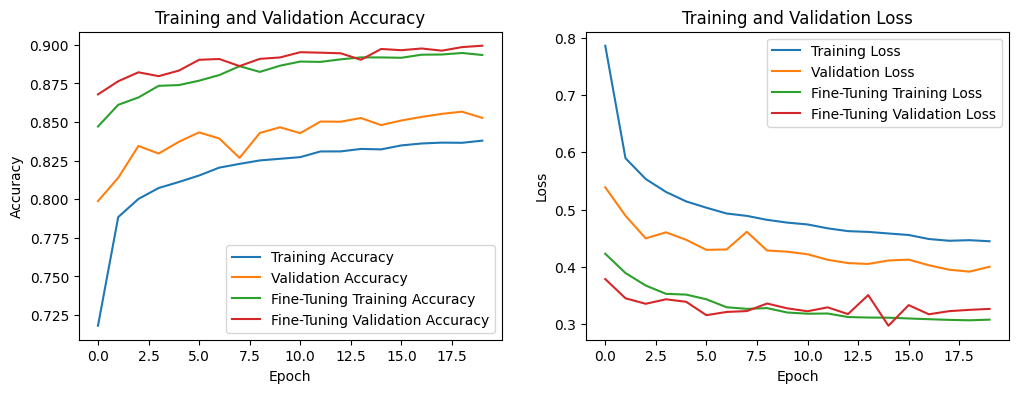

In [17]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history_fine.history['accuracy'], label='Fine-Tuning Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Fine-Tuning Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history_fine.history['loss'], label='Fine-Tuning Training Loss')
plt.plot(history_fine.history['val_loss'], label='Fine-Tuning Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()